In [3]:
#hide
#from fastbook import *
from fastai import *

In [4]:
Path.BASE_PATH = Path('./chest_xray_data/')
path = Path.BASE_PATH
Path.BASE_PATH.ls()


(#3) [Path('.DS_Store'),Path('pneumonia'),Path('normal')]

In [5]:
fns = get_image_files(path)
fns

(#5856) [Path('pneumonia/person63_bacteria_306.jpeg'),Path('pneumonia/person1438_bacteria_3721.jpeg'),Path('pneumonia/person755_bacteria_2659.jpeg'),Path('pneumonia/person478_virus_975.jpeg'),Path('pneumonia/person661_bacteria_2553.jpeg'),Path('pneumonia/person276_bacteria_1296.jpeg'),Path('pneumonia/person1214_bacteria_3166.jpeg'),Path('pneumonia/person1353_virus_2333.jpeg'),Path('pneumonia/person26_bacteria_122.jpeg'),Path('pneumonia/person124_virus_238.jpeg')...]

In [4]:
verify_images(fns)

(#0) []

In [6]:
xrays = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)



In [7]:
dls = xrays.dataloaders(path, batch_size=32, num_workers=4)
dls.bs

32

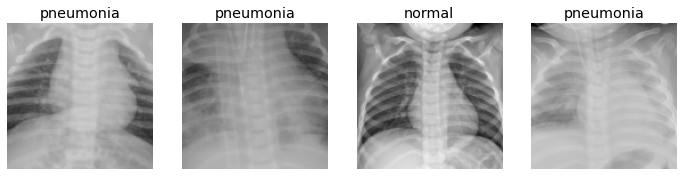

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

In [9]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.419931,0.269577,0.087959,03:36


epoch,train_loss,valid_loss,error_rate,time
0,0.191377,0.126519,0.041845,04:57


In [10]:
learn.export()

In [12]:
interp = ClassificationInterpretation.from_learner(learn)

RuntimeError: DataLoader worker (pid 1461) is killed by signal: Abort trap: 6. 